In [1]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
import pandas as pd
df = pd.read_csv('bhp_us_d (3).csv')
df.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,2024-01-02,67.99,68.4100,67.740,67.91,2545063
1,2024-01-03,66.46,67.4800,66.334,67.18,2372906
2,2024-01-04,66.30,66.7900,66.130,66.59,1887983
3,2024-01-05,65.64,66.5600,65.630,66.02,2159039
4,2024-01-08,65.04,66.1267,64.960,66.02,2329018


In [ ]:
df.shape

(333, 6)

In [ ]:
df.columns = df.columns.str.strip()


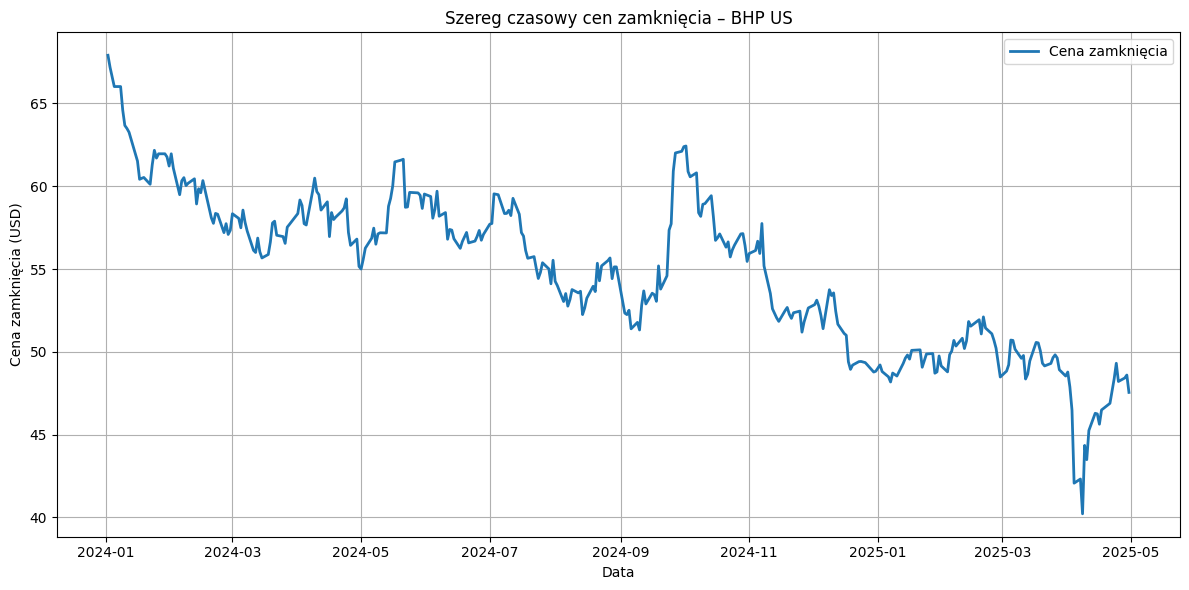

In [ ]:
import matplotlib.pyplot as plt

df['Data'] = pd.to_datetime(df['Data'])

plt.figure(figsize=(12, 6))
plt.plot(df['Data'], df['Zamkniecie'], label='Cena zamknięcia', linewidth=2)
plt.title('Szereg czasowy cen zamknięcia – BHP US')
plt.xlabel('Data')
plt.ylabel('Cena zamknięcia (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


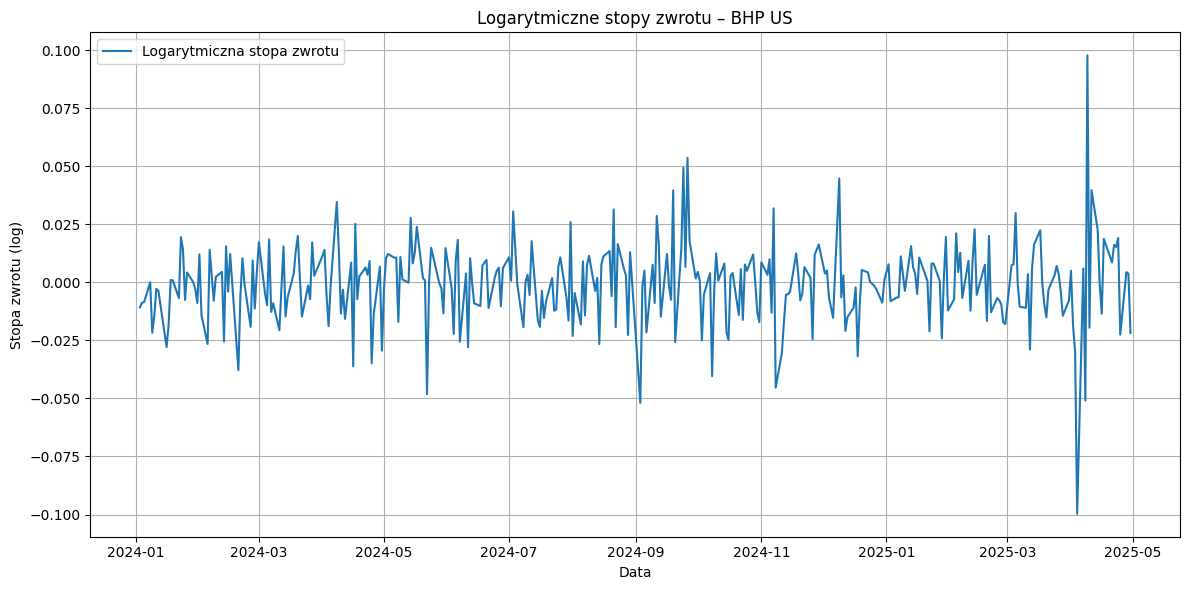

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
df['Data'] = pd.to_datetime(df['Data'])
df['Log_Return'] = np.log(df['Zamkniecie'] / df['Zamkniecie'].shift(1))
plt.figure(figsize=(12, 6))
plt.plot(df['Data'], df['Log_Return'], label='Logarytmiczna stopa zwrotu')
plt.title('Logarytmiczne stopy zwrotu – BHP US')
plt.xlabel('Data')
plt.ylabel('Stopa zwrotu (log)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

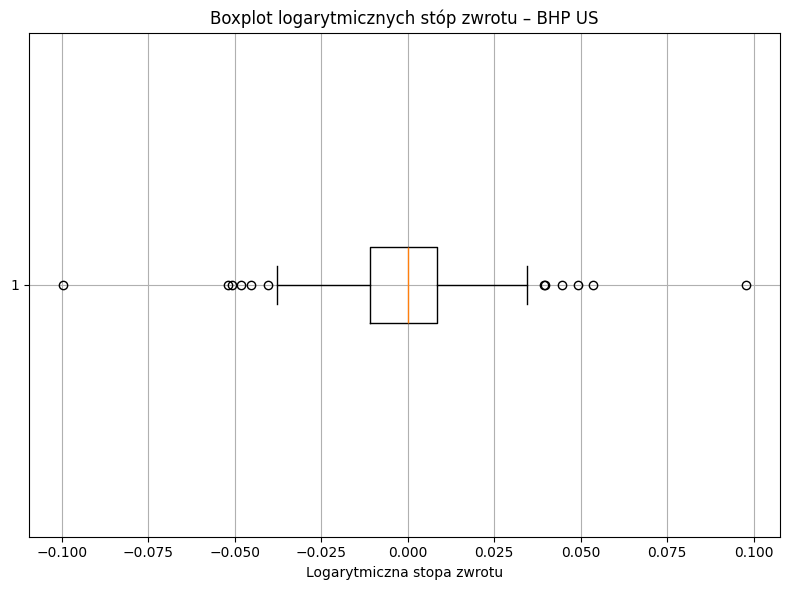

In [ ]:
import matplotlib.pyplot as plt
log_returns = df['Log_Return'].dropna()
plt.figure(figsize=(8, 6))
plt.boxplot(log_returns, vert=False)
plt.title('Boxplot logarytmicznych stóp zwrotu – BHP US')
plt.xlabel('Logarytmiczna stopa zwrotu')
plt.grid(True)
plt.tight_layout()
plt.show()


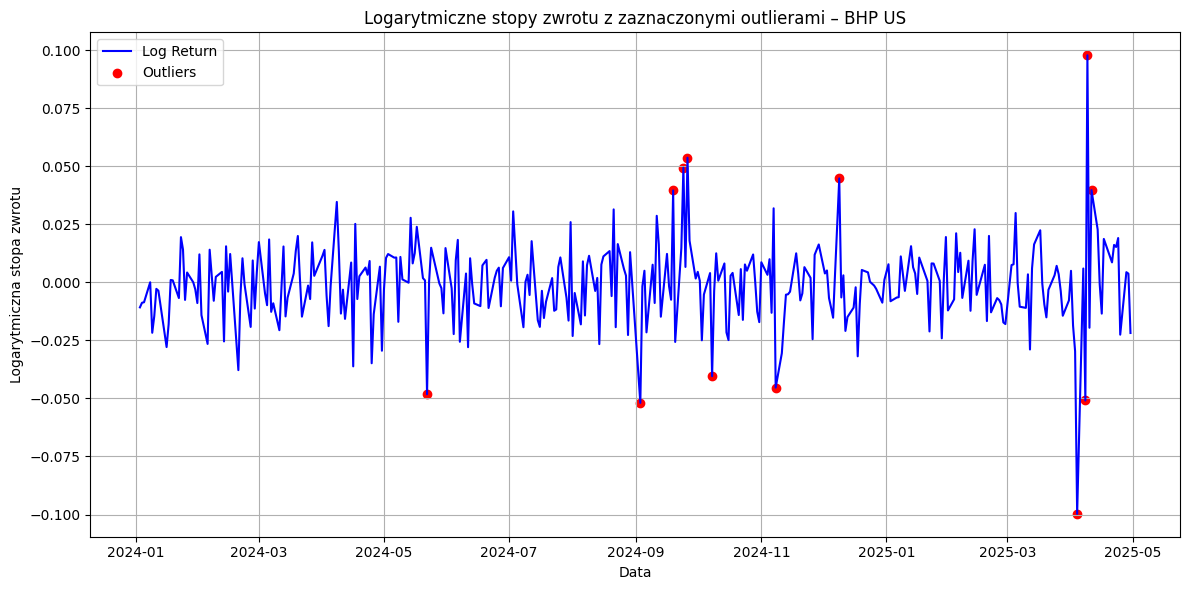

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
df['Data'] = pd.to_datetime(df['Data'])
df['Log_Return'] = np.log(df['Zamkniecie'] / df['Zamkniecie'].shift(1))
log_returns = df['Log_Return'].dropna()
Q1 = log_returns.quantile(0.25)
Q3 = log_returns.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Log_Return'] < lower_bound) | (df['Log_Return'] > upper_bound)]
plt.figure(figsize=(12, 6))
plt.plot(df['Data'], df['Log_Return'], label='Log Return', color='blue')
plt.scatter(outliers['Data'], outliers['Log_Return'], color='red', label='Outliers')  # punkty odstające
plt.title('Logarytmiczne stopy zwrotu z zaznaczonymi outlierami – BHP US')
plt.xlabel('Data')
plt.ylabel('Logarytmiczna stopa zwrotu')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Mean of Log Returns: -0.0010734985245009047
Standard Deviation of Log Returns: 0.017454007573333537
Skewness of Log Returns: -0.04845113617141966
Kurtosis of Log Returns: 5.918671163158816


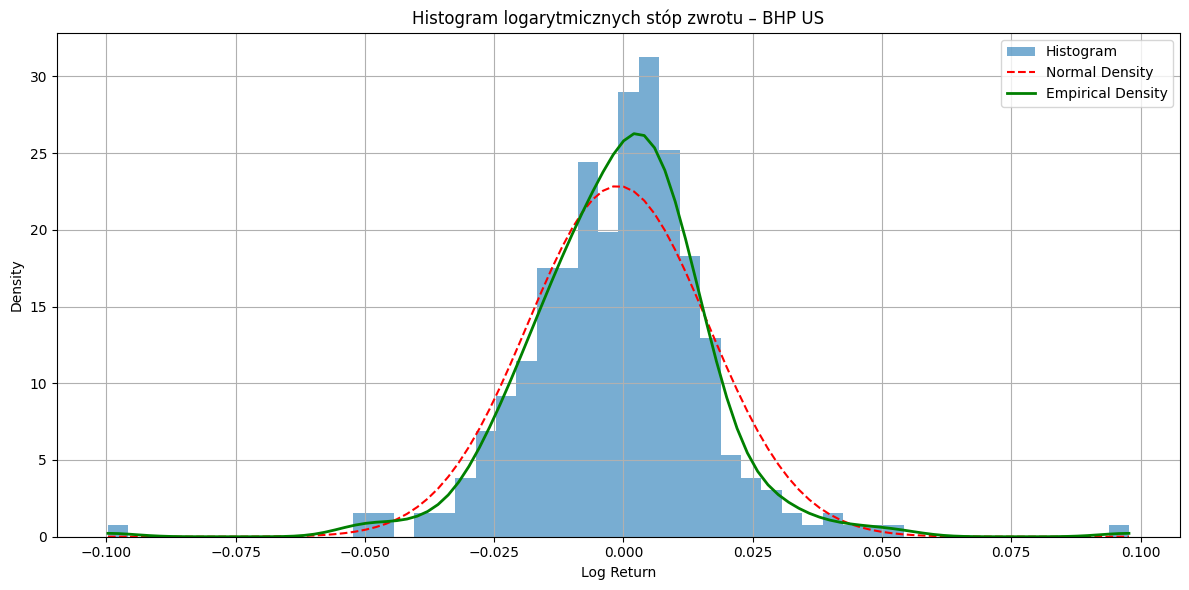

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde


df['Log_Return'] = np.log(df['Zamkniecie'] / df['Zamkniecie'].shift(1))
log_returns = df['Log_Return'].dropna()


mean = log_returns.mean()
std = log_returns.std()
skewness = log_returns.skew()
kurtosis = log_returns.kurt()

print(f"Mean of Log Returns: {mean}")
print(f"Standard Deviation of Log Returns: {std}")
print(f"Skewness of Log Returns: {skewness}")
print(f"Kurtosis of Log Returns: {kurtosis}")

plt.figure(figsize=(12, 6))
plt.hist(log_returns, bins=50, density=True, alpha=0.6, label='Histogram')

x = np.linspace(log_returns.min(), log_returns.max(), 100)
plt.plot(x, norm.pdf(x, mean, std), 'r--', label='Normal Density')

kde = gaussian_kde(log_returns)
plt.plot(x, kde(x), 'g-', lw=2, label='Empirical Density')

plt.title('Histogram logarytmicznych stóp zwrotu – BHP US')
plt.xlabel('Log Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

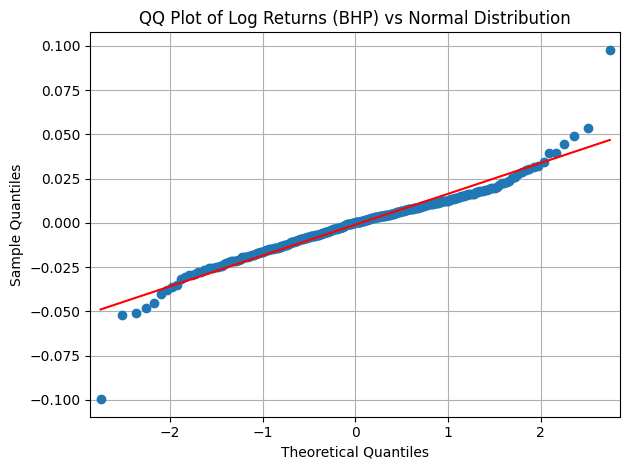

<Figure size 800x600 with 0 Axes>

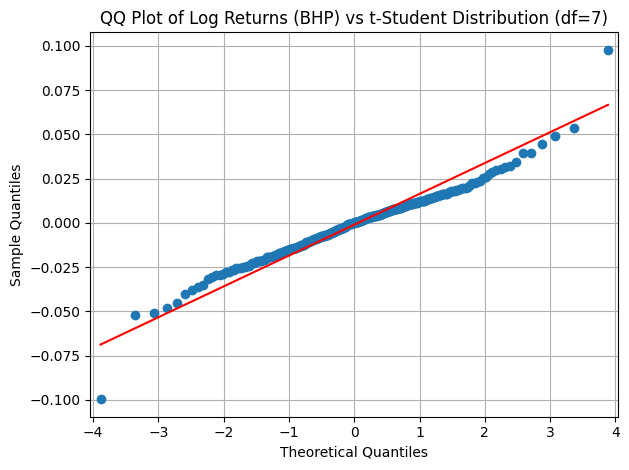

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import t

df['Log_Return'] = np.log(df['Zamkniecie'] / df['Zamkniecie'].shift(1))
log_returns = df['Log_Return'].dropna()

plt.figure(figsize=(8, 6))
sm.qqplot(log_returns, line='s')
plt.title('QQ Plot of Log Returns (BHP) vs Normal Distribution')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sm.qqplot(log_returns, dist=t, distargs=(7,), line='s')
plt.title('QQ Plot of Log Returns (BHP) vs t-Student Distribution (df=7)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.tight_layout()
plt.show()


Jarque-Bera test statistic: 467.39221856445704
Jarque-Bera p-value: 3.2141733544930762e-102
Kolmogorov-Smirnov test statistic: 0.4762789375971763
Kolmogorov-Smirnov p-value: 1.03425009372068e-69
Odrzucamy hipotezę o normalności rozkładu (test JB).
Odrzucamy hipotezę o normalności rozkładu (test KS).


<Figure size 1000x500 with 0 Axes>

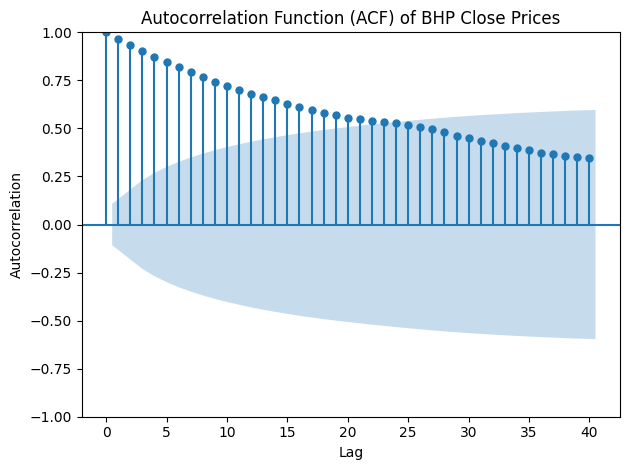

In [ ]:
from scipy.stats import jarque_bera, kstest
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

df['Log_Return'] = np.log(df['Zamkniecie'] / df['Zamkniecie'].shift(1))
log_returns = df['Log_Return'].dropna()

jb_stat, jb_p = jarque_bera(log_returns)
print(f"Jarque-Bera test statistic: {jb_stat}")
print(f"Jarque-Bera p-value: {jb_p}")

ks_stat, ks_p = kstest(log_returns, 'norm')
print(f"Kolmogorov-Smirnov test statistic: {ks_stat}")
print(f"Kolmogorov-Smirnov p-value: {ks_p}")

alpha = 0.05

if jb_p > alpha:
    print("Nie ma podstaw do odrzucenia hipotezy o normalności rozkładu (test JB).")
else:
    print("Odrzucamy hipotezę o normalności rozkładu (test JB).")

if ks_p > alpha:
    print("Nie ma podstaw do odrzucenia hipotezy o normalności rozkładu (test KS).")
else:
    print("Odrzucamy hipotezę o normalności rozkładu (test KS).")

plt.figure(figsize=(10, 5))
plot_acf(df['Zamkniecie'].dropna(), lags=40)
plt.title('Autocorrelation Function (ACF) of BHP Close Prices')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.tight_layout()
plt.show()


<Figure size 1000x500 with 0 Axes>

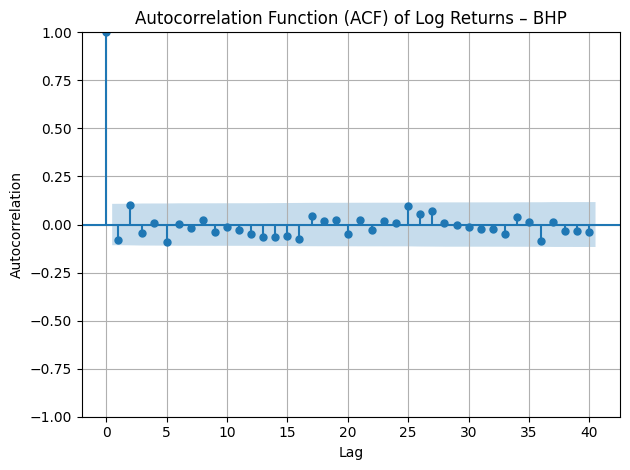


Ljung–Box test for Close Prices:
        lb_stat      lb_pvalue
1    313.365667   4.036912e-70
2    608.663014  6.768709e-133
3    885.312095  1.357998e-191
4   1144.259444  1.929619e-246
5   1386.446438  1.190129e-297
6   1614.786592   0.000000e+00
7   1830.033775   0.000000e+00
8   2032.629828   0.000000e+00
9   2222.375732   0.000000e+00
10  2401.362112   0.000000e+00
11  2571.294505   0.000000e+00
12  2732.544235   0.000000e+00
13  2885.638430   0.000000e+00
14  3031.352335   0.000000e+00
15  3170.270901   0.000000e+00
16  3301.205146   0.000000e+00
17  3426.668029   0.000000e+00
18  3545.867135   0.000000e+00
19  3660.402105   0.000000e+00
20  3770.748075   0.000000e+00
21  3878.407828   0.000000e+00
22  3982.525005   0.000000e+00
23  4084.085769   0.000000e+00
24  4184.017623   0.000000e+00
25  4281.568019   0.000000e+00
26  4375.309122   0.000000e+00
27  4464.695441   0.000000e+00
28  4548.719042   0.000000e+00
29  4627.278489   0.000000e+00
30  4701.613416   0.000000e+00
31  4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

df['Log_Return'] = np.log(df['Zamkniecie'] / df['Zamkniecie'].shift(1))

plt.figure(figsize=(10, 5))
plot_acf(df['Log_Return'].dropna(), lags=40)
plt.title('Autocorrelation Function (ACF) of Log Returns – BHP')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.tight_layout()
plt.show()

lb_test_prices = acorr_ljungbox(df['Zamkniecie'].dropna(), lags=40)
print("\nLjung–Box test for Close Prices:")
print(lb_test_prices)

lb_test_returns = acorr_ljungbox(df['Log_Return'].dropna(), lags=40)
print("\nLjung–Box test for Log Returns:")
print(lb_test_returns)

alpha = 0.05

if lb_test_prices['lb_pvalue'].iloc[-1] < alpha:
    print(f"Odrzucamy hipotezę zerową o braku autokorelacji dla cen zamknięcia (p-value={lb_test_prices['lb_pvalue'].iloc[-1]:.4f}). Istnieje autokorelacja.")
else:
    print(f"Nie ma podstaw do odrzucenia hipotezy zerowej o braku autokorelacji dla cen zamknięcia (p-value={lb_test_prices['lb_pvalue'].iloc[-1]:.4f}).")

if lb_test_returns['lb_pvalue'].iloc[-1] < alpha:
    print(f"Odrzucamy hipotezę zerową o braku autokorelacji dla logarytmicznych stóp zwrotu (p-value={lb_test_returns['lb_pvalue'].iloc[-1]:.4f}). Istnieje autokorelacja.")
else:
    print(f"Nie ma podstaw do odrzucenia hipotezy zerowej o braku autokorelacji dla logarytmicznych stóp zwrotu (p-value={lb_test_returns['lb_pvalue'].iloc[-1]:.4f}).")


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pfizer.csv to pfizer.csv


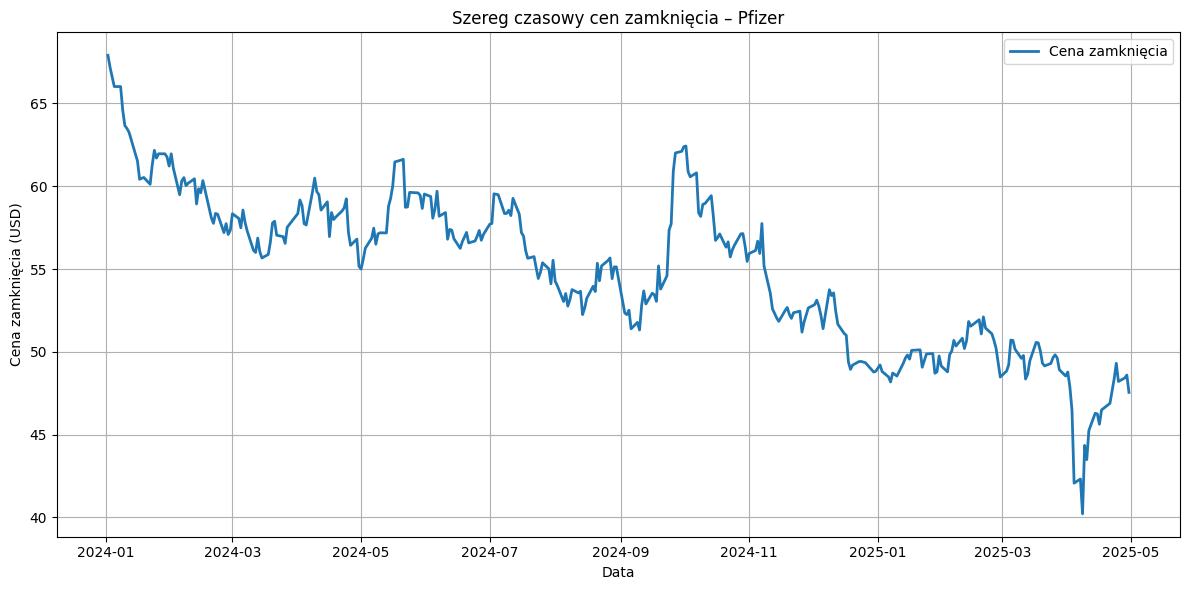

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Data'], df['Zamkniecie'], label='Cena zamknięcia', linewidth=2)
plt.title('Szereg czasowy cen zamknięcia – Pfizer')
plt.xlabel('Data')
plt.ylabel('Cena zamknięcia (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

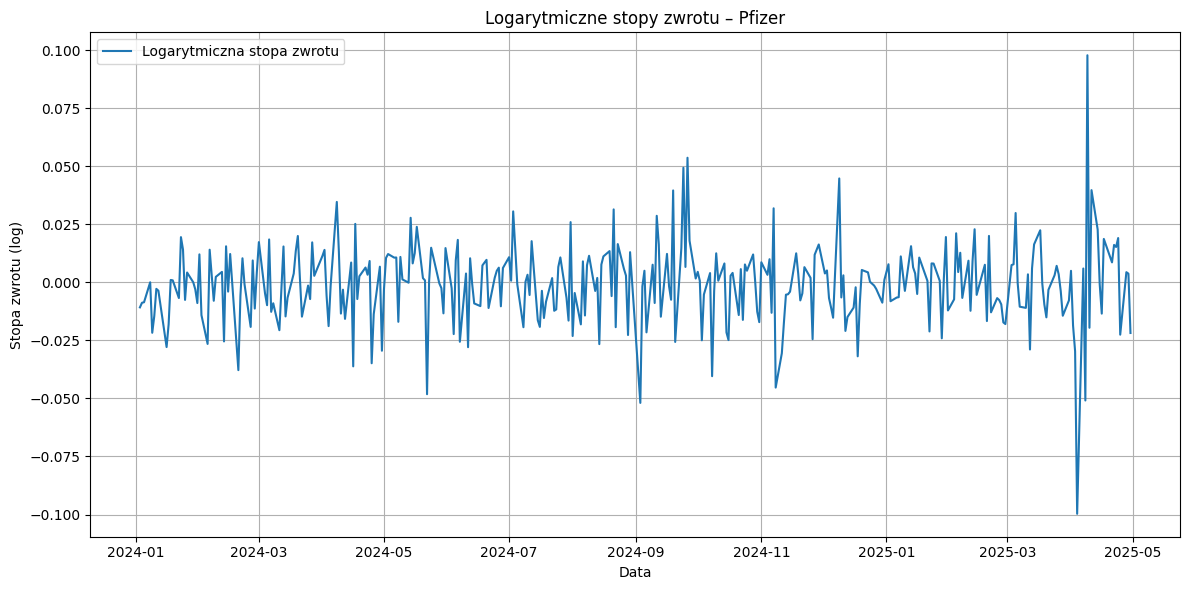

In [ ]:
df['Log_Return'] = np.log(df['Zamkniecie'] / df['Zamkniecie'].shift(1))
plt.figure(figsize=(12, 6))
plt.plot(df['Data'], df['Log_Return'], label='Logarytmiczna stopa zwrotu')
plt.title('Logarytmiczne stopy zwrotu – Pfizer')
plt.xlabel('Data')
plt.ylabel('Stopa zwrotu (log)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

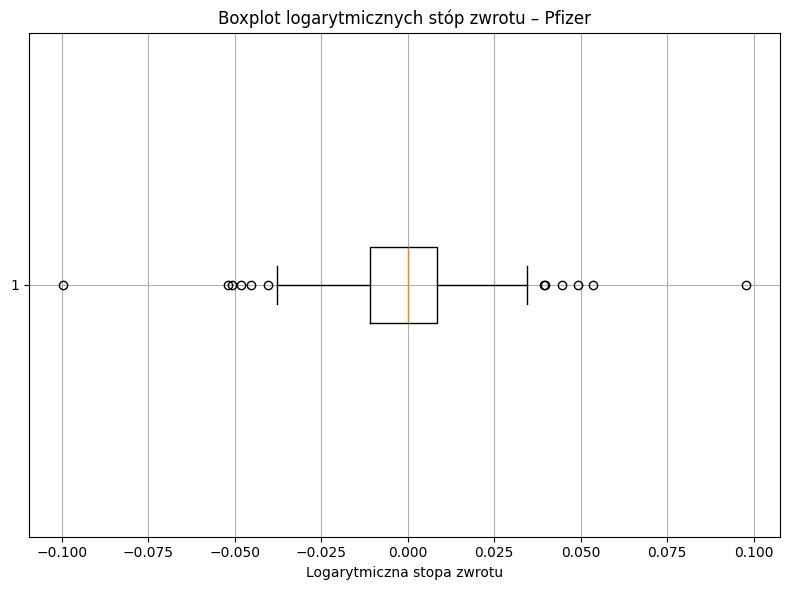

In [ ]:
log_returns = df['Log_Return'].dropna()
plt.figure(figsize=(8, 6))
plt.boxplot(log_returns, vert=False)
plt.title('Boxplot logarytmicznych stóp zwrotu – Pfizer')
plt.xlabel('Logarytmiczna stopa zwrotu')
plt.grid(True)
plt.tight_layout()
plt.show()

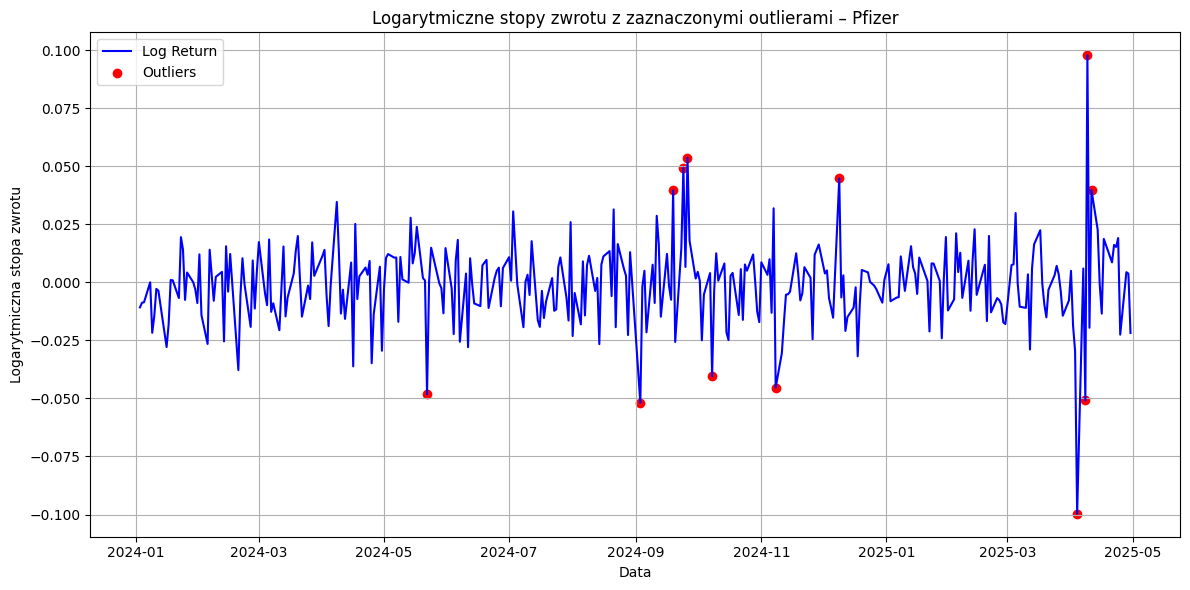

In [ ]:
Q1 = log_returns.quantile(0.25)
Q3 = log_returns.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Log_Return'] < lower_bound) | (df['Log_Return'] > upper_bound)]

plt.figure(figsize=(12, 6))
plt.plot(df['Data'], df['Log_Return'], label='Log Return', color='blue')
plt.scatter(outliers['Data'], outliers['Log_Return'], color='red', label='Outliers')
plt.title('Logarytmiczne stopy zwrotu z zaznaczonymi outlierami – Pfizer')
plt.xlabel('Data')
plt.ylabel('Logarytmiczna stopa zwrotu')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Mean of Log Returns: -0.0010734985245009047
Standard Deviation of Log Returns: 0.017454007573333537
Skewness of Log Returns: -0.04845113617141966
Kurtosis of Log Returns: 5.918671163158816


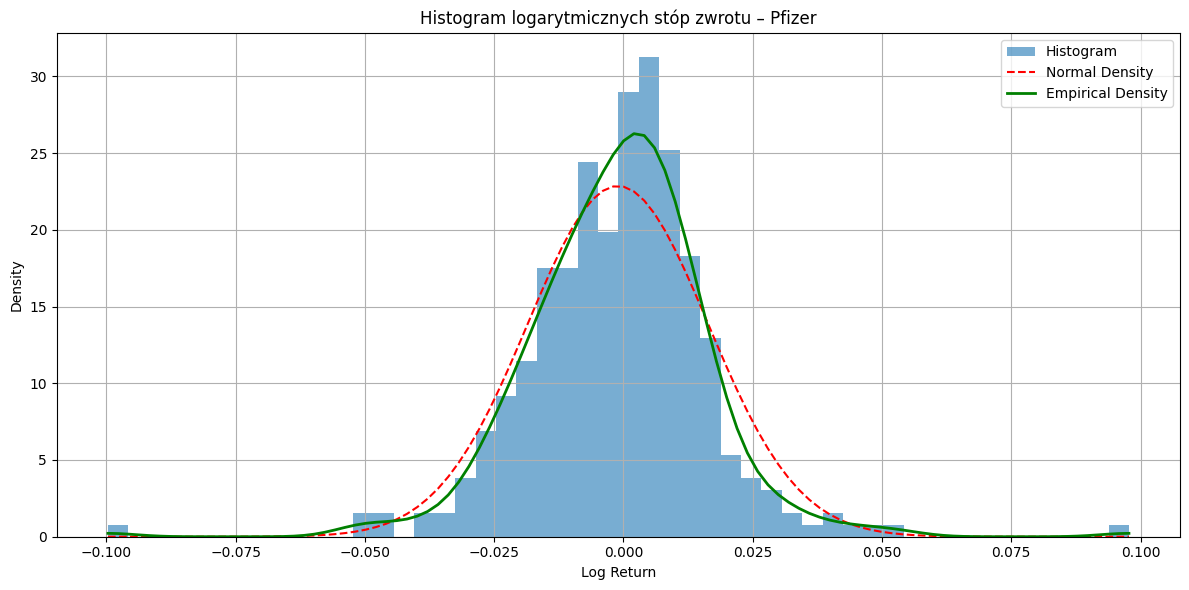

In [ ]:
mean = log_returns.mean()
std = log_returns.std()
skewness = log_returns.skew()
kurtosis = log_returns.kurt()

print(f"Mean of Log Returns: {mean}")
print(f"Standard Deviation of Log Returns: {std}")
print(f"Skewness of Log Returns: {skewness}")
print(f"Kurtosis of Log Returns: {kurtosis}")

plt.figure(figsize=(12, 6))
plt.hist(log_returns, bins=50, density=True, alpha=0.6, label='Histogram')

x = np.linspace(log_returns.min(), log_returns.max(), 100)
plt.plot(x, norm.pdf(x, mean, std), 'r--', label='Normal Density')
kde = gaussian_kde(log_returns)
plt.plot(x, kde(x), 'g-', lw=2, label='Empirical Density')

plt.title('Histogram logarytmicznych stóp zwrotu – Pfizer')
plt.xlabel('Log Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

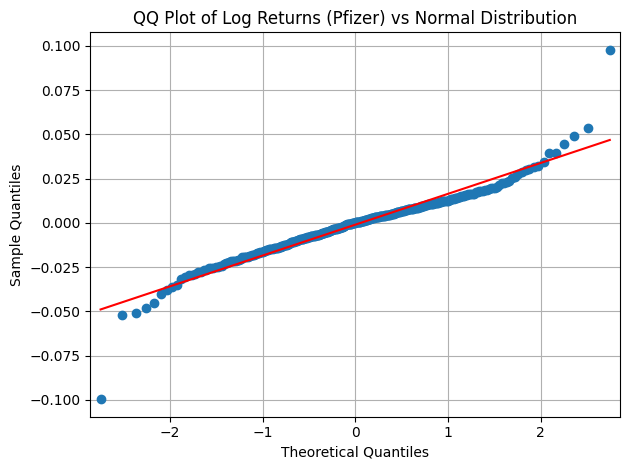

<Figure size 800x600 with 0 Axes>

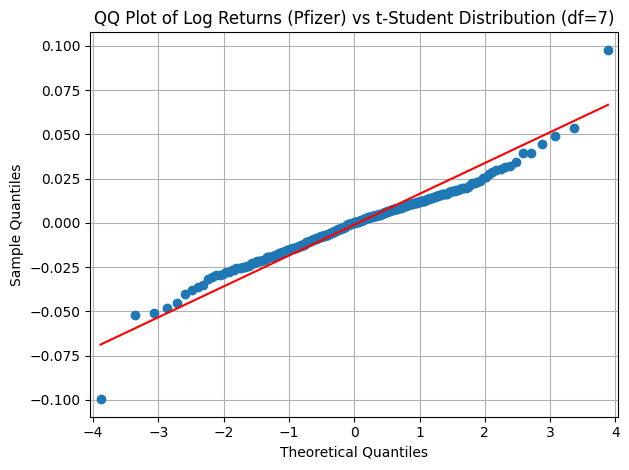

In [ ]:
plt.figure(figsize=(8, 6))
sm.qqplot(log_returns, line='s')
plt.title('QQ Plot of Log Returns (Pfizer) vs Normal Distribution')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sm.qqplot(log_returns, dist=t, distargs=(7,), line='s')
plt.title('QQ Plot of Log Returns (Pfizer) vs t-Student Distribution (df=7)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
jb_stat, jb_p = jarque_bera(log_returns)
print(f"Jarque-Bera test statistic: {jb_stat}")
print(f"Jarque-Bera p-value: {jb_p}")

ks_stat, ks_p = kstest(log_returns, 'norm')
print(f"Kolmogorov-Smirnov test statistic: {ks_stat}")
print(f"Kolmogorov-Smirnov p-value: {ks_p}")

alpha = 0.05
if jb_p > alpha:
    print("Nie ma podstaw do odrzucenia hipotezy o normalności rozkładu (test JB).")
else:
    print("Odrzucamy hipotezę o normalności rozkładu (test JB).")

if ks_p > alpha:
    print("Nie ma podstaw do odrzucenia hipotezy o normalności rozkładu (test KS).")
else:
      print("Odrzucamy hipotezę o normalności rozkładu (test KS).")

Jarque-Bera test statistic: 467.39221856445704
Jarque-Bera p-value: 3.2141733544930762e-102
Kolmogorov-Smirnov test statistic: 0.4762789375971763
Kolmogorov-Smirnov p-value: 1.03425009372068e-69
Odrzucamy hipotezę o normalności rozkładu (test JB).
Odrzucamy hipotezę o normalności rozkładu (test KS).


<Figure size 1000x500 with 0 Axes>

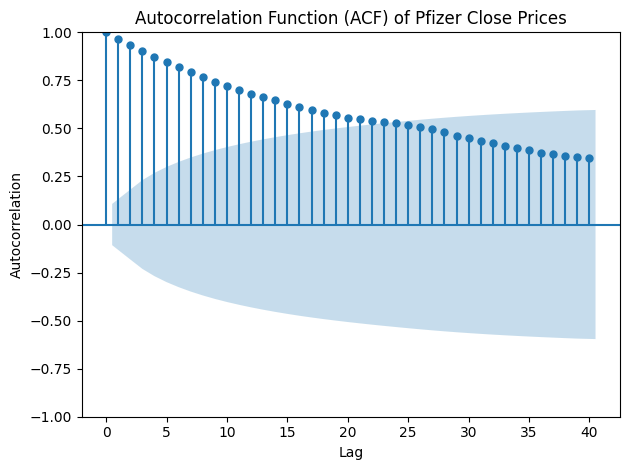

In [ ]:
plt.figure(figsize=(10, 5))
plot_acf(df['Zamkniecie'].dropna(), lags=40)
plt.title('Autocorrelation Function (ACF) of Pfizer Close Prices')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

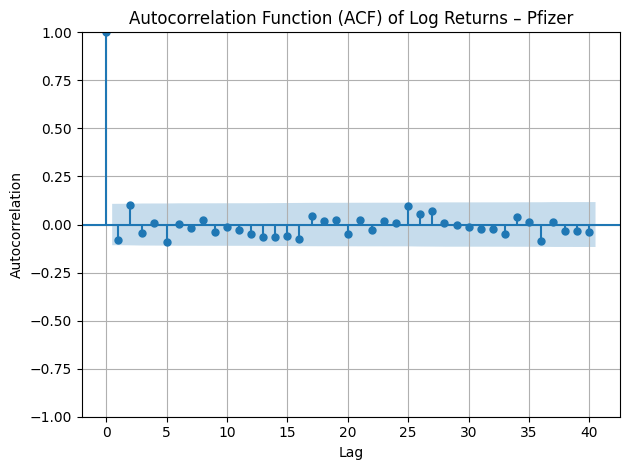

In [ ]:
plt.figure(figsize=(10, 5))
plot_acf(df['Log_Return'].dropna(), lags=40)
plt.title('Autocorrelation Function (ACF) of Log Returns – Pfizer')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Ljung–Box
lb_test_prices = acorr_ljungbox(df['Zamkniecie'].dropna(), lags=40)
print("\nLjung–Box test for Close Prices:")
print(lb_test_prices)

lb_test_returns = acorr_ljungbox(df['Log_Return'].dropna(), lags=40)
print("\nLjung–Box test for Log Returns:")
print(lb_test_returns)

if lb_test_prices['lb_pvalue'].iloc[-1] < alpha:
    print(f"Odrzucamy hipotezę zerową o braku autokorelacji dla cen zamknięcia (p-value={lb_test_prices['lb_pvalue'].iloc[-1]:.4f}). Istnieje autokorelacja.")
else:
    print(f"Nie ma podstaw do odrzucenia hipotezy zerowej o braku autokorelacji dla cen zamknięcia (p-value={lb_test_prices['lb_pvalue'].iloc[-1]:.4f}).")

if lb_test_returns['lb_pvalue'].iloc[-1] < alpha:
    print(f"Odrzucamy hipotezę zerową o braku autokorelacji dla logarytmicznych stóp zwrotu (p-value={lb_test_returns['lb_pvalue'].iloc[-1]:.4f}). Istnieje autokorelacja.")
else:
    print(f"Nie ma podstaw do odrzucenia hipotezy zerowej o braku autokorelacji dla logarytmicznych stóp zwrotu (p-value={lb_test_returns['lb_pvalue'].iloc[-1]:.4f}).")


Ljung–Box test for Close Prices:
        lb_stat      lb_pvalue
1    313.365667   4.036912e-70
2    608.663014  6.768709e-133
3    885.312095  1.357998e-191
4   1144.259444  1.929619e-246
5   1386.446438  1.190129e-297
6   1614.786592   0.000000e+00
7   1830.033775   0.000000e+00
8   2032.629828   0.000000e+00
9   2222.375732   0.000000e+00
10  2401.362112   0.000000e+00
11  2571.294505   0.000000e+00
12  2732.544235   0.000000e+00
13  2885.638430   0.000000e+00
14  3031.352335   0.000000e+00
15  3170.270901   0.000000e+00
16  3301.205146   0.000000e+00
17  3426.668029   0.000000e+00
18  3545.867135   0.000000e+00
19  3660.402105   0.000000e+00
20  3770.748075   0.000000e+00
21  3878.407828   0.000000e+00
22  3982.525005   0.000000e+00
23  4084.085769   0.000000e+00
24  4184.017623   0.000000e+00
25  4281.568019   0.000000e+00
26  4375.309122   0.000000e+00
27  4464.695441   0.000000e+00
28  4548.719042   0.000000e+00
29  4627.278489   0.000000e+00
30  4701.613416   0.000000e+00
31  4

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving LVMH.csv to LVMH.csv


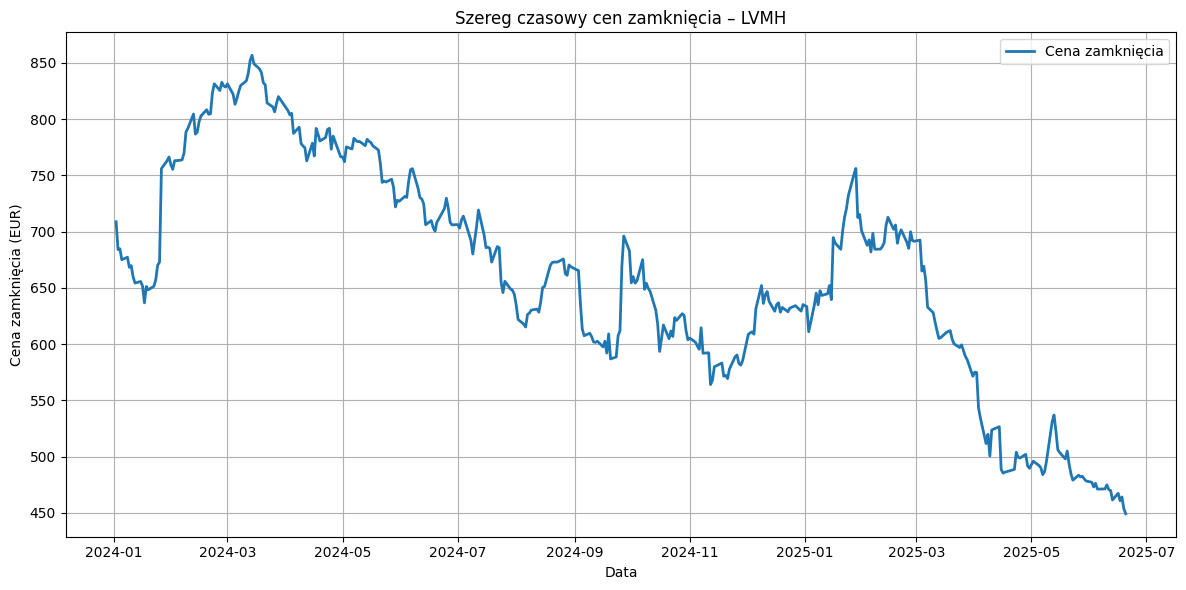

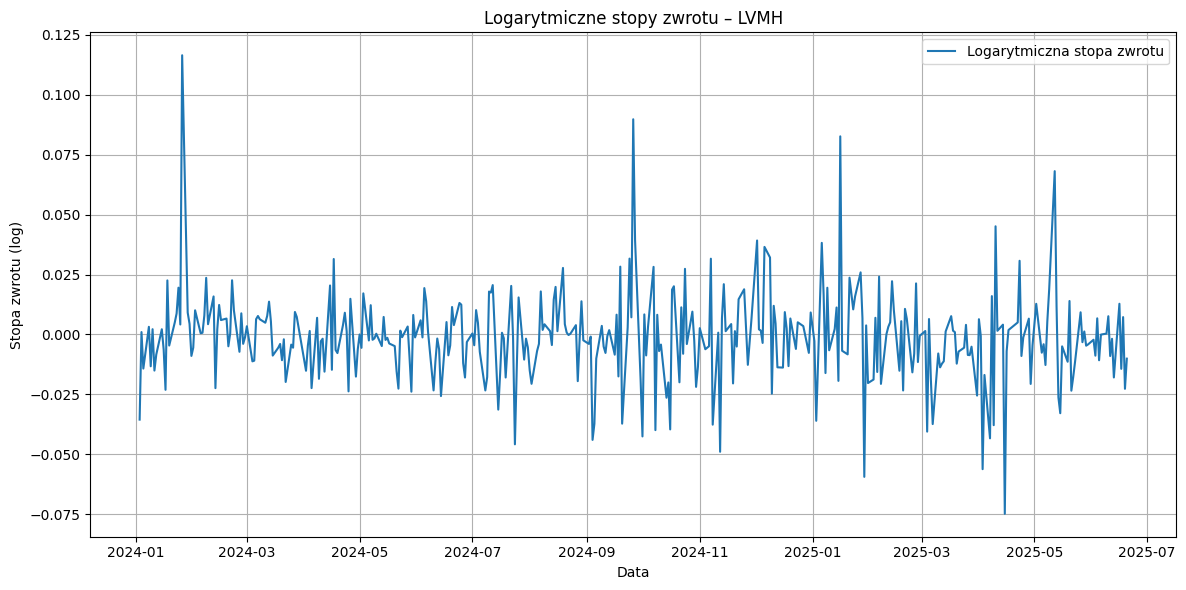

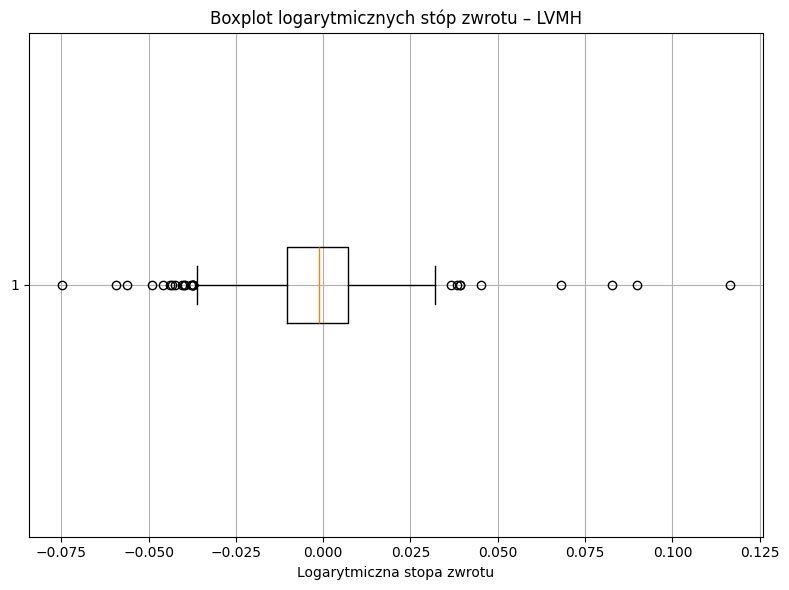

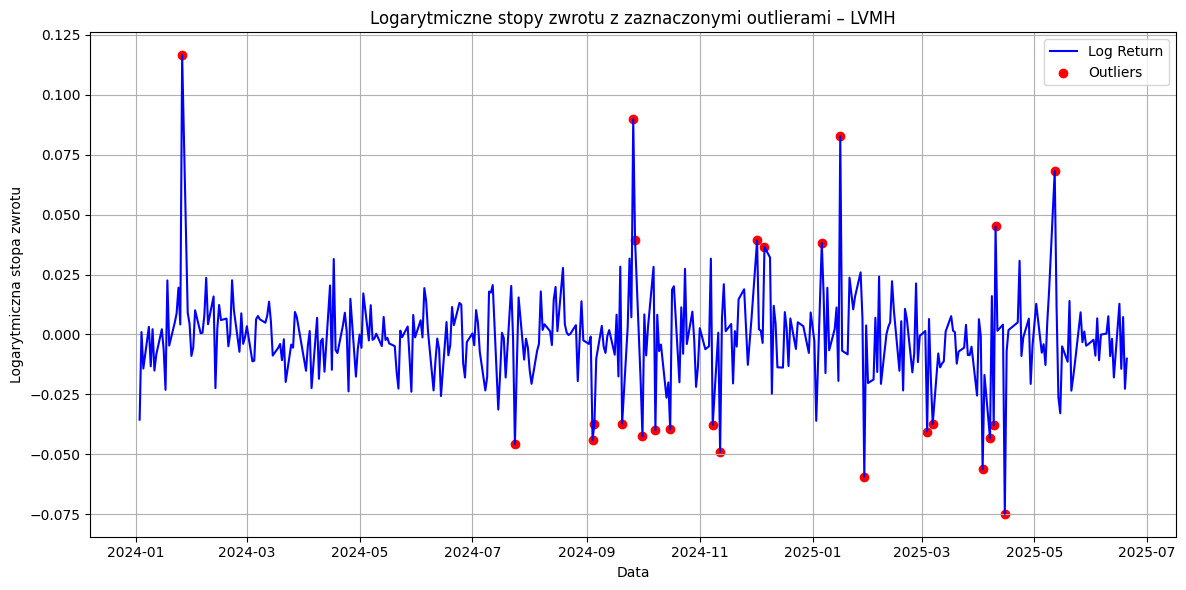

Mean of Log Returns: -0.001216708641389074
Standard Deviation of Log Returns: 0.018841244530649413
Skewness of Log Returns: 0.8724849087438725
Kurtosis of Log Returns: 6.885894008122129


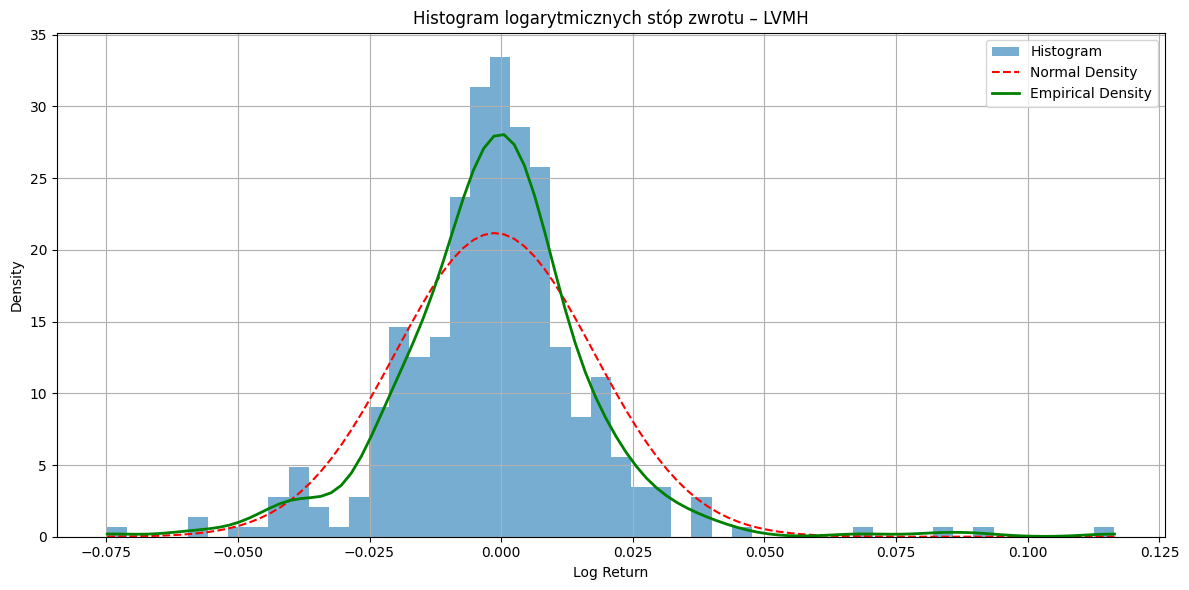

<Figure size 800x600 with 0 Axes>

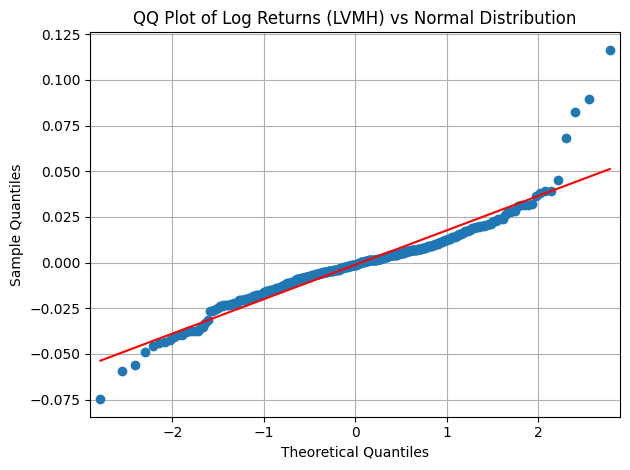

<Figure size 800x600 with 0 Axes>

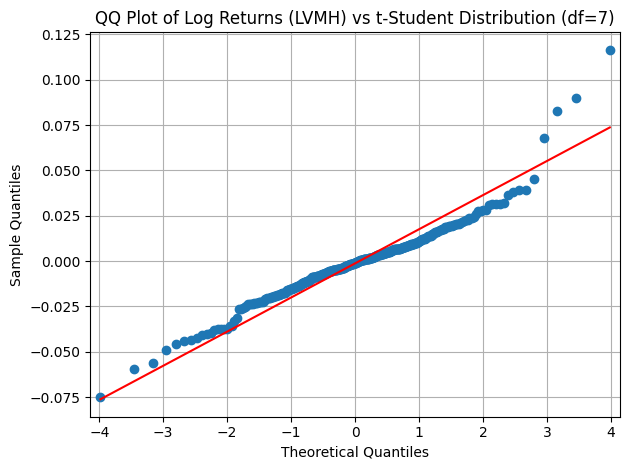

Jarque-Bera test statistic: 765.1280245216797
Jarque-Bera p-value: 7.15419050160182e-167
Kolmogorov-Smirnov test statistic: 0.47365419806877357
Kolmogorov-Smirnov p-value: 9.245956074921225e-78
Odrzucamy hipotezę o normalności rozkładu (test JB).
Odrzucamy hipotezę o normalności rozkładu (test KS).


<Figure size 1000x500 with 0 Axes>

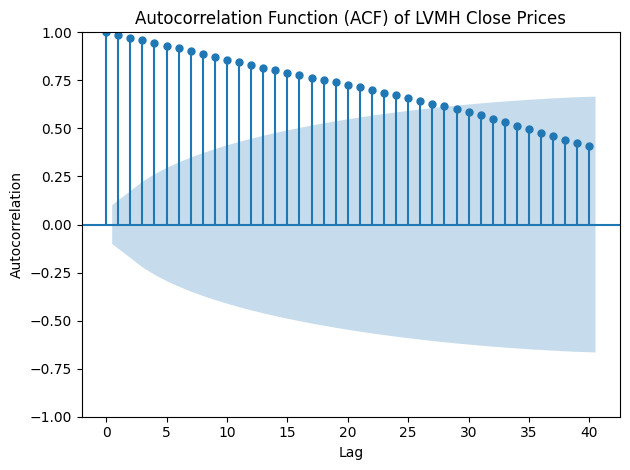

<Figure size 1000x500 with 0 Axes>

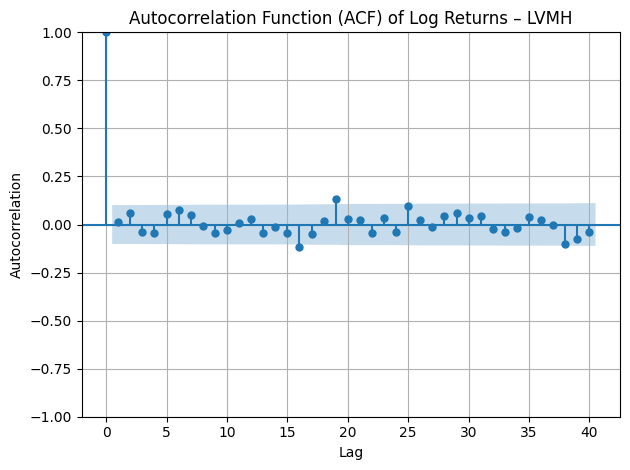


Ljung–Box test for Close Prices:
        lb_stat      lb_pvalue
1    368.401204   4.171609e-82
2    727.548831  1.034615e-158
3   1077.361744  2.967517e-233
4   1417.913856  9.018830e-306
5   1750.059962   0.000000e+00
6   2073.015554   0.000000e+00
7   2386.654206   0.000000e+00
8   2690.709049   0.000000e+00
9   2985.591366   0.000000e+00
10  3271.592685   0.000000e+00
11  3549.068839   0.000000e+00
12  3818.230277   0.000000e+00
13  4079.050734   0.000000e+00
14  4331.878601   0.000000e+00
15  4576.825390   0.000000e+00
16  4814.283083   0.000000e+00
17  5045.300214   0.000000e+00
18  5270.559664   0.000000e+00
19  5489.386662   0.000000e+00
20  5700.737726   0.000000e+00
21  5904.272435   0.000000e+00
22  6100.158674   0.000000e+00
23  6289.050693   0.000000e+00
24  6471.131593   0.000000e+00
25  6646.472240   0.000000e+00
26  6814.643573   0.000000e+00
27  6975.656414   0.000000e+00
28  7130.188180   0.000000e+00
29  7278.291086   0.000000e+00
30  7419.375991   0.000000e+00
31  7

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde, jarque_bera, kstest, t
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Wczytanie danych z pliku LVMH
df = pd.read_csv('LVMH.csv')
df.columns = df.columns.str.strip()
df['Data'] = pd.to_datetime(df['Data'])

# Wykres cen zamknięcia
plt.figure(figsize=(12, 6))
plt.plot(df['Data'], df['Zamkniecie'], label='Cena zamknięcia', linewidth=2)
plt.title('Szereg czasowy cen zamknięcia – LVMH')
plt.xlabel('Data')
plt.ylabel('Cena zamknięcia (EUR)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Logarytmiczne stopy zwrotu
df['Log_Return'] = np.log(df['Zamkniecie'] / df['Zamkniecie'].shift(1))
plt.figure(figsize=(12, 6))
plt.plot(df['Data'], df['Log_Return'], label='Logarytmiczna stopa zwrotu')
plt.title('Logarytmiczne stopy zwrotu – LVMH')
plt.xlabel('Data')
plt.ylabel('Stopa zwrotu (log)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Boxplot
log_returns = df['Log_Return'].dropna()
plt.figure(figsize=(8, 6))
plt.boxplot(log_returns, vert=False)
plt.title('Boxplot logarytmicznych stóp zwrotu – LVMH')
plt.xlabel('Logarytmiczna stopa zwrotu')
plt.grid(True)
plt.tight_layout()
plt.show()

# Outliery
Q1 = log_returns.quantile(0.25)
Q3 = log_returns.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Log_Return'] < lower_bound) | (df['Log_Return'] > upper_bound)]

plt.figure(figsize=(12, 6))
plt.plot(df['Data'], df['Log_Return'], label='Log Return', color='blue')
plt.scatter(outliers['Data'], outliers['Log_Return'], color='red', label='Outliers')
plt.title('Logarytmiczne stopy zwrotu z zaznaczonymi outlierami – LVMH')
plt.xlabel('Data')
plt.ylabel('Logarytmiczna stopa zwrotu')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Histogram i gęstości
mean = log_returns.mean()
std = log_returns.std()
skewness = log_returns.skew()
kurtosis = log_returns.kurt()

print(f"Mean of Log Returns: {mean}")
print(f"Standard Deviation of Log Returns: {std}")
print(f"Skewness of Log Returns: {skewness}")
print(f"Kurtosis of Log Returns: {kurtosis}")

plt.figure(figsize=(12, 6))
plt.hist(log_returns, bins=50, density=True, alpha=0.6, label='Histogram')

x = np.linspace(log_returns.min(), log_returns.max(), 100)
plt.plot(x, norm.pdf(x, mean, std), 'r--', label='Normal Density')
kde = gaussian_kde(log_returns)
plt.plot(x, kde(x), 'g-', lw=2, label='Empirical Density')

plt.title('Histogram logarytmicznych stóp zwrotu – LVMH')
plt.xlabel('Log Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# QQ plot vs rozkład normalny i t-Studenta
plt.figure(figsize=(8, 6))
sm.qqplot(log_returns, line='s')
plt.title('QQ Plot of Log Returns (LVMH) vs Normal Distribution')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sm.qqplot(log_returns, dist=t, distargs=(7,), line='s')
plt.title('QQ Plot of Log Returns (LVMH) vs t-Student Distribution (df=7)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.tight_layout()
plt.show()

# Testy normalności
jb_stat, jb_p = jarque_bera(log_returns)
print(f"Jarque-Bera test statistic: {jb_stat}")
print(f"Jarque-Bera p-value: {jb_p}")

ks_stat, ks_p = kstest(log_returns, 'norm')
print(f"Kolmogorov-Smirnov test statistic: {ks_stat}")
print(f"Kolmogorov-Smirnov p-value: {ks_p}")

alpha = 0.05
if jb_p > alpha:
    print("Nie ma podstaw do odrzucenia hipotezy o normalności rozkładu (test JB).")
else:
    print("Odrzucamy hipotezę o normalności rozkładu (test JB).")

if ks_p > alpha:
    print("Nie ma podstaw do odrzucenia hipotezy o normalności rozkładu (test KS).")
else:
    print("Odrzucamy hipotezę o normalności rozkładu (test KS).")

# ACF cen zamknięcia
plt.figure(figsize=(10, 5))
plot_acf(df['Zamkniecie'].dropna(), lags=40)
plt.title('Autocorrelation Function (ACF) of LVMH Close Prices')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.tight_layout()
plt.show()

# ACF logarytmicznych stóp zwrotu
plt.figure(figsize=(10, 5))
plot_acf(df['Log_Return'].dropna(), lags=40)
plt.title('Autocorrelation Function (ACF) of Log Returns – LVMH')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.tight_layout()
plt.show()

# Ljung–Box
lb_test_prices = acorr_ljungbox(df['Zamkniecie'].dropna(), lags=40)
print("\nLjung–Box test for Close Prices:")
print(lb_test_prices)

lb_test_returns = acorr_ljungbox(df['Log_Return'].dropna(), lags=40)
print("\nLjung–Box test for Log Returns:")
print(lb_test_returns)

if lb_test_prices['lb_pvalue'].iloc[-1] < alpha:
    print(f"Odrzucamy hipotezę zerową o braku autokorelacji dla cen zamknięcia (p-value={lb_test_prices['lb_pvalue'].iloc[-1]:.4f}). Istnieje autokorelacja.")
else:
    print(f"Nie ma podstaw do odrzucenia hipotezy zerowej o braku autokorelacji dla cen zamknięcia (p-value={lb_test_prices['lb_pvalue'].iloc[-1]:.4f}).")

if lb_test_returns['lb_pvalue'].iloc[-1] < alpha:
    print(f"Odrzucamy hipotezę zerową o braku autokorelacji dla logarytmicznych stóp zwrotu (p-value={lb_test_returns['lb_pvalue'].iloc[-1]:.4f}). Istnieje autokorelacja.")
else:
    print(f"Nie ma podstaw do odrzucenia hipotezy zerowej o braku autokorelacji dla logarytmicznych stóp zwrotu (p-value={lb_test_returns['lb_pvalue'].iloc[-1]:.4f}).")


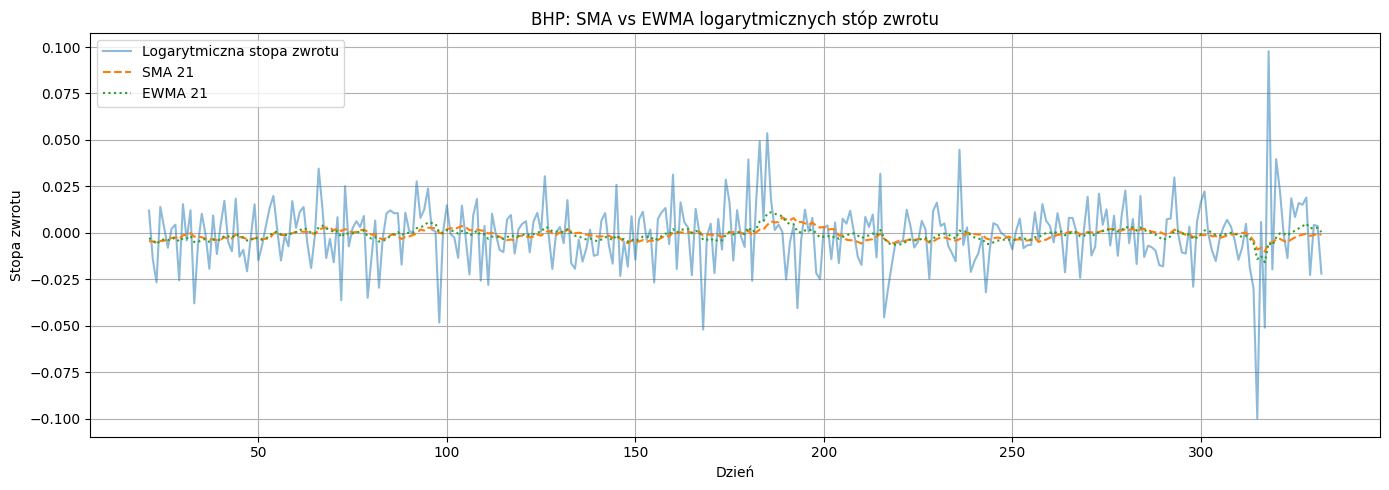

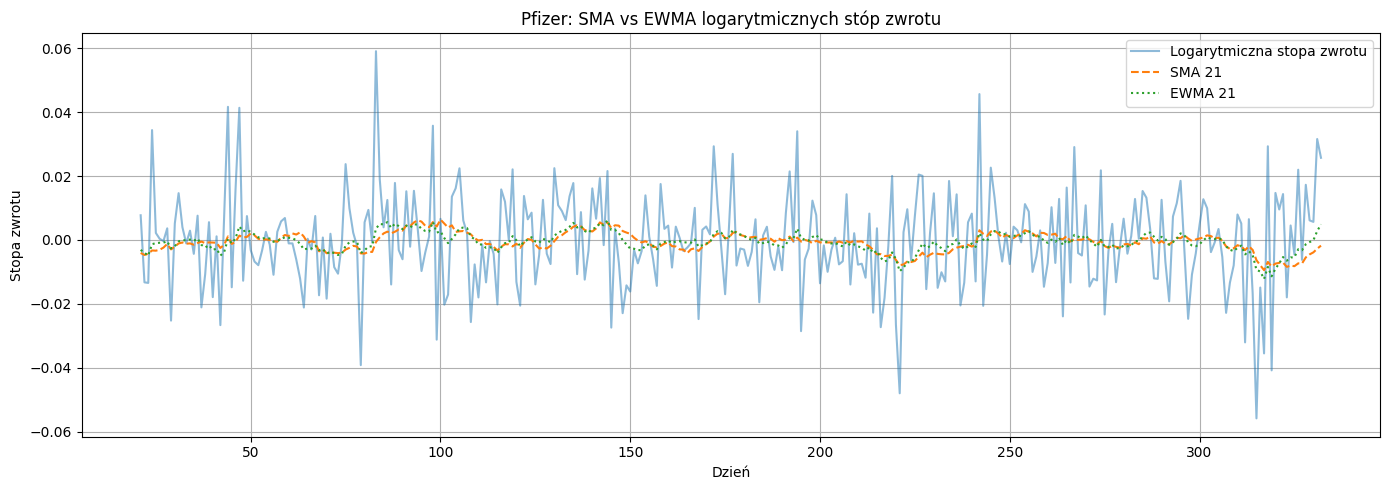

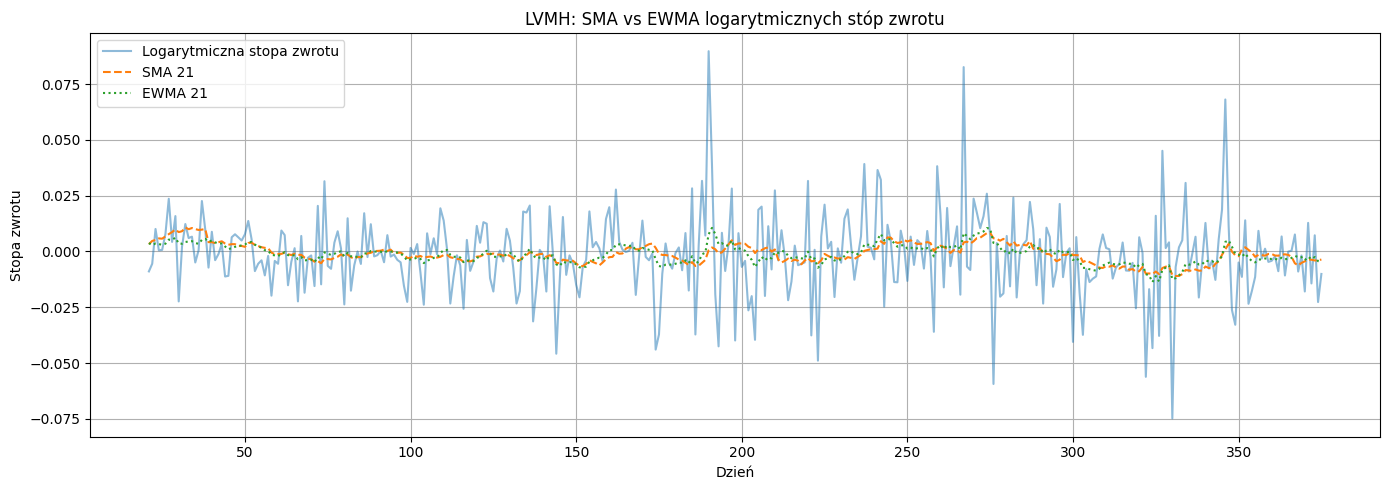

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_stock(file_path, stock_name, window=21):
    df = pd.read_csv(file_path)

    if 'Zamkniecie' not in df.columns:
        raise ValueError(f"W pliku {file_path} nie znaleziono kolumny 'Zamkniecie'. Sprawdź nagłówki.")

    df['log_return'] = np.log(df['Zamkniecie'] / df['Zamkniecie'].shift(1))

    df['SMA'] = df['log_return'].rolling(window=window).mean()
    df['EWMA'] = df['log_return'].ewm(span=window, adjust=False).mean()

    df.dropna(inplace=True)

    plt.figure(figsize=(14, 5))
    plt.plot(df['log_return'], label='Logarytmiczna stopa zwrotu', alpha=0.5)
    plt.plot(df['SMA'], label=f'SMA {window}', linestyle='--')
    plt.plot(df['EWMA'], label=f'EWMA {window}', linestyle=':')
    plt.title(f'{stock_name}: SMA vs EWMA logarytmicznych stóp zwrotu')
    plt.xlabel('Dzień')
    plt.ylabel('Stopa zwrotu')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

stocks = [
    ('bhp_us_d (3).csv', 'BHP'),
    ('pfizer.csv', 'Pfizer'),
    ('LVMH.csv', 'LVMH')
]

for file_path, name in stocks:
    process_stock(file_path, name)

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

def calculate_var_cvar(log_returns, alpha=0.05):
    mean = log_returns.mean()
    std = log_returns.std(ddof=1)

    var_param = norm.ppf(alpha, mean, std)
    cvar_param = mean - std * norm.pdf(norm.ppf(alpha)) / alpha

    var_nonparam = np.percentile(log_returns, 100 * alpha)
    cvar_nonparam = log_returns[log_returns <= var_nonparam].mean()

    return {
        'VaR_param': var_param,
        'CVaR_param': cvar_param,
        'VaR_nonparam': var_nonparam,
        'CVaR_nonparam': cvar_nonparam
    }

stocks = [
    ('bhp_us_d (3).csv', 'BHP'),
    ('pfizer.csv', 'Pfizer'),
    ('LVMH.csv', 'LVMH')
]

results = []

for file_path, stock_name in stocks:
    df = pd.read_csv(file_path)
    if 'Zamkniecie' not in df.columns:
        raise ValueError(f"Plik {file_path} nie zawiera kolumny 'Zamkniecie'")

    df['log_return'] = np.log(df['Zamkniecie'] / df['Zamkniecie'].shift(1))
    df.dropna(inplace=True)

    risk_metrics = calculate_var_cvar(df['log_return'])
    risk_metrics['Stock'] = stock_name
    results.append(risk_metrics)

results_df = pd.DataFrame(results)
results_df = results_df[['Stock', 'VaR_param', 'CVaR_param', 'VaR_nonparam', 'CVaR_nonparam']]
display(results_df)


,Stock,VaR_param,CVaR_param,VaR_nonparam,CVaR_nonparam
0,BHP,-0.029783,-0.037076,-0.026580,-0.039904
1,Pfizer,-0.025170,-0.031413,-0.024279,-0.032389
2,LVMH,-0.032208,-0.040081,-0.031793,-0.043506
